In [3]:
%load_ext autoreload

%autoreload 2
import sys
import numpy as np
import matplotlib.pyplot as plt
import see_fits
import scipy
from scipy.ndimage import gaussian_filter
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import abundance as cl_count
import covariance as covar
import utils
import edit
import h5py
Omega_c_true = 0.30711 - 0.048254
Omega_b_true = 0.048254
sigma8_true = .8288
Omegam_true = 0.30711
True_value = [Omega_c_true + Omega_b_true, sigma8_true]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
#datG = see_fits.mean_var_covar('/pbs/throng/lsst/users/cpayerne/ClusterLikelihoods_data/weights_old/Gaussian_4x4*')
#datP=see_fits.mean_var_covar('/pbs/throng/lsst/users/cpayerne/ClusterLikelihoods_data/weights_old/Poissonian_4x4*')
#datMPG=see_fits.mean_var_covar('/pbs/throng/lsst/users/cpayerne/ClusterLikelihoods_data/cosmological_constraints/MPG_20x30*')

In [5]:
import glob
file=glob.glob('/sps/lsst/users/cpayerne/1000xsimulations/analysis/100zx100m/mean_dispersion/MPG_*')

In [6]:
len(file)

500

In [7]:
binning=['4zx4m','20zx30m', '100zx100m']
likelihood=['Poissonian','Gaussian','MPG']
cosmology = {binning[i]:{likelihood_:None for likelihood_ in likelihood} for i in range(len(binning))}
for b in binning:
    try:
        cosmology[b]['Poissonian']=see_fits.mean_var_covar('/sps/lsst/users/cpayerne/1000xsimulations/analysis/'+b+'/mean_dispersion/Poissonian*')
        cosmology[b]['Gaussian']  =see_fits.mean_var_covar('/sps/lsst/users/cpayerne/1000xsimulations/analysis/'+b+'/mean_dispersion/Gaussian*')
        cosmology[b]['MPG']       =see_fits.mean_var_covar('/sps/lsst/users/cpayerne/1000xsimulations/analysis/'+b+'/mean_dispersion/MPG*')
    except: 
        continue

# Forecast

In [8]:
forecast4x4=edit.load_pickle('/pbs/throng/lsst/users/cpayerne/ClusterLikelihoods_data/Covariances/Fisher_covariance.pickle')

In [9]:
forecast4x4

{'4zx4m': {'Poissonian': array([[ 3.76873719e-06, -2.05737551e-06],
         [-2.05737551e-06,  1.35418873e-06]]),
  'Gaussian': array([[ 5.75554086e-06, -2.92255360e-06],
         [-2.92255360e-06,  1.87307308e-06]])},
 '20zx30m': {'Poissonian': array([[ 3.27729655e-06, -1.74862855e-06],
         [-1.74862855e-06,  1.16003322e-06]]),
  'Gaussian': array([[ 5.50581960e-06, -2.61932081e-06],
         [-2.61932081e-06,  1.70757569e-06]])},
 '100zx100m': {'Poissonian': array([[ 3.26467069e-06, -1.74077984e-06],
         [-1.74077984e-06,  1.15514867e-06]]),
  'Gaussian': array([[ 4.81543763e-06, -2.33996713e-06],
         [-2.33996713e-06,  1.49188057e-06]])}}

# Mean

Poissonian
Gaussian
MPG


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


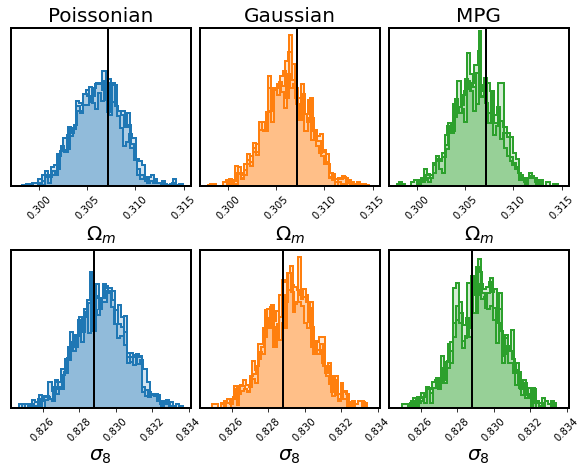

In [23]:
title = ['Poissonian', 'Gaussian', 'MPG']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c',]
n=11
maxsOm=250
maxss8=400
alpha=[.3, .6, .9]
fig, ax = plt.subplots(2, 3, figsize = (10,7), sharex='row', sharey='row')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.05, hspace=.4)
label = ['Poissonian', 'Gaussian', 'MPG']
show = [True, True, True]
ls=['-','-','--']
for k in range(3):
    likelihood_=likelihood[k]
    print(likelihood_)
    for i, b in enumerate(binning):
        #if i!=2: continue
        err_norm=1e-3
            #try:
        try:
            
            ax[0,k].vlines(True_value[0],0,maxsOm,ls='-',color='k',linewidth=2)
            ax[1,k].vlines(True_value[1],0,maxss8,ls='-', color='k',linewidth=2)
            x=np.array(cosmology[b][likelihood_]['Om'])#/np.std(cosmology[b][likelihood_]['Om'])-1
            y=np.array(cosmology[b][likelihood_]['s8'])#/np.std(cosmology[b][likelihood_]['s8'])-1
            #cov=np.cov(x,y)
            for s,x_ in enumerate([x,y]):
                hist,x_edges =np.histogram(x_, bins=50)
                x_middle=np.array([(x_edges[i]+x_edges[i+1])/2 for i in range(len(x_edges)-1)])
                y=gaussian_filter(hist, sigma=1.5)
                if s==0: 
                    label=b
                else:label=None
                #ax[s,k].fill_between(x_middle,x_middle*0, y/scipy.integrate.simps(y,x_middle),
                 #                    color=colors[k], alpha=alpha[i],edgecolor="k", label=b)
                #ax[s,k].plot(x_middle, y/scipy.integrate.simps(y,x_middle),
                 #                    color=colors[i], alpha=1, label=b)
                ax[s,k].hist(x_, density=True, bins=50, color=colors[k],linewidth=2, alpha=.2)
                ax[s,k].hist(x_, density=True, bins=50, histtype='step',color=colors[k],linewidth=2)
             
        except: a=1

    #except: continue
for i in range(2):
    for j in range(3):
        ax[0,0].legend(frameon=False, fontsize=12, loc='upper left')
        ax[0,j].set_title(title[j], fontsize=20)
        ax[0,j].set_xlabel(r'$\Omega_m$', fontsize = 20)
        ax[1,j].set_xlabel(r'$\sigma_8$', fontsize = 20)
        ax[i,j].tick_params(axis='both', which = 'major', labelsize= 10)
        ax[0,j].set_ylim(0,maxsOm)
        ax[1,j].set_ylim(0,maxss8)
        ax[i,j].tick_params(axis='x', rotation=45)
        ax[i,j].set_yticks([], minor=False)
#plt.savefig('best_fit_distribution.pdf', bbox_inches='tight', dpi=300)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Poissonian
Gaussian
MPG


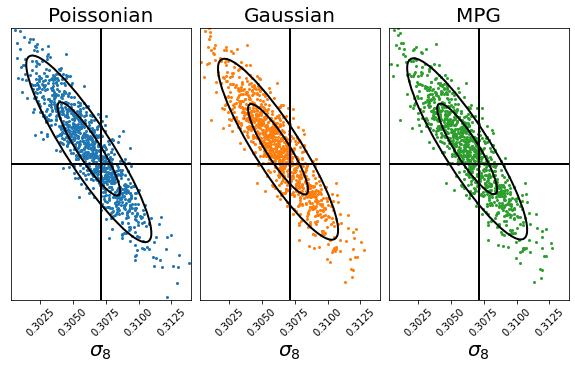

In [11]:
fig, ax = plt.subplots(1, 3, figsize = (10,5), sharex=True, sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.05, hspace=.4)
label = ['Poissonian', 'Gaussian', 'MPG']
show = [True, True, True]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c',]
ls=['-','-','--']
for k in range(3):
    likelihood_=likelihood[k]
    print(likelihood_)
    ax[k].vlines(True_value[0],0,1,ls='-',color='k',linewidth=2)
    ax[k].hlines(True_value[1],0,1,ls='-', color='k',linewidth=2)
    x=np.array(cosmology[b][likelihood_]['Om'])#/np.std(cosmology[b][likelihood_]['Om'])-1
    y=np.array(cosmology[b][likelihood_]['s8'])#/np.std(cosmology[b][likelihood_]['s8'])-1
    ax[k].scatter(x,y,c=colors[k],s=4)
    cov = np.cov([x,y])
    utils._make_ellipse(np.mean([x,y],axis=1), cov, ax=ax[k], level=0.95, color='k', label = None, ls = '-')

    #except: continue
n=3
for j in range(3):
            ax[j].legend(frameon=False, fontsize=12, loc='upper left')
            ax[j].set_title(title[j], fontsize=20)
            ax[j].set_xlabel(r'$\Omega_m$', fontsize = 20)
            ax[j].set_xlabel(r'$\sigma_8$', fontsize = 20)
            ax[j].set_xlim(True_value[0]- n*cov[0,0]**.5, True_value[0] + n*cov[0,0]**.5)
            ax[j].set_ylim(True_value[1]- n*cov[1,1]**.5, True_value[1] + n*cov[1,1]**.5)
            ax[j].tick_params(axis='both', which = 'major', labelsize= 10)
            ax[j].tick_params(axis='x', rotation=45)
            ax[j].set_yticks([], minor=False)

# Standard deviation

Poissonian
4zx4m
Gaussian
4zx4m
MPG
4zx4m
Poissonian
20zx30m
Gaussian
20zx30m
MPG
20zx30m
Poissonian
100zx100m
Gaussian
100zx100m
MPG
100zx100m


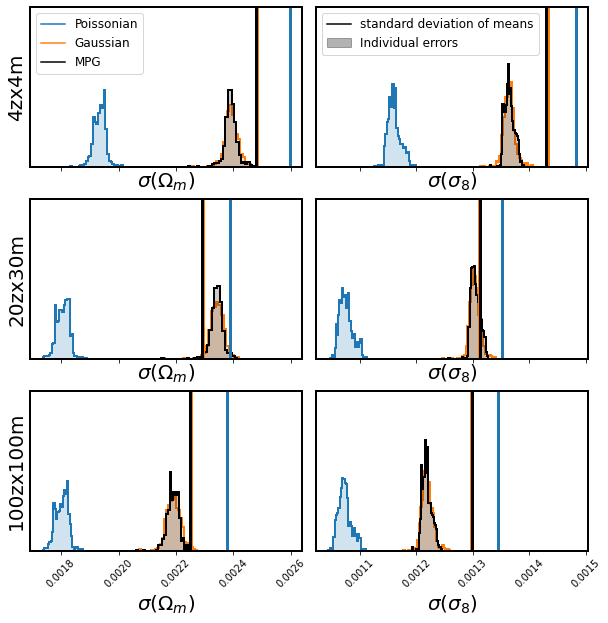

In [20]:
title = ['Poissonian', 'Gaussian', 'MPG']
colors = ['#1f77b4', '#ff7f0e', 'k']#'#2ca02c',]
n=11
maxsOm=50000
maxss8=90000
alpha=[.3, .6, .9]
fig, ax = plt.subplots(3, 2, figsize = (10,10),sharex='col')
plt.rcParams['axes.linewidth']= 2
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.05, hspace=.2)
label = ['Poissonian', 'Gaussian', 'MPG']
show = [True, True, True]
ls=['-','-','--']
for i, b in enumerate(binning):
    for k in range(3):
        likelihood_=likelihood[k]
        print(likelihood_)
        print(b)
        err_norm=1e-3
                #try:
        if k < 2:
            fOm=forecast4x4[b][title[k]][0,0]**.5#/np.std(cosmology[b][likelihood_]['Om'])-1
            #ax[i,0].vlines(fOm,0,maxsOm,ls='--', color=colors[k],alpha=1,linewidth=3)
            fs8=forecast4x4[b][title[k]][1,1]**.5#/np.std(cosmology[b][likelihood_]['Om'])-1
            #ax[i,1].vlines(fs8,0,maxss8,ls='--', color=colors[k],alpha=1,linewidth=3)
        try:
            ax[i,0].vlines(np.std(cosmology[b][likelihood_]['Om'], ddof=1),0,maxsOm,ls='-',color=colors[k],alpha=1,linewidth=3)
            ax[i,1].vlines(np.std(cosmology[b][likelihood_]['s8'], ddof=1),0,maxss8,ls='-', color=colors[k],alpha=1,linewidth=3)

            x=np.array(cosmology[b][likelihood[k]]['cov'][:,0,0]**.5)#/np.std(cosmology[b][likelihood_]['Om'])-1
            y=np.array(cosmology[b][likelihood[k]]['cov'][:,1,1]**.5)#/np.std(cosmology[b][likelihood_]['Om'])-1
            x_=[x,y]
            for s, x in enumerate(x_):
                hist,x_edges =np.histogram(x, bins=150)
                x_middle=np.array([(x_edges[i]+x_edges[i+1])/2 for i in range(len(x_edges)-1)])
                y=gaussian_filter(hist, sigma=1)
                #ax[i,s].fill_between(x_middle,x_middle*0, y/scipy.integrate.simps(y,x_middle),
                #                     color=colors[k], alpha=0.1)
                #ax[i,s].hist(x,density=True, color=colors[k],bins=50, alpha=.5)
                ax[i,s].hist(x, density=True, bins=30, color=colors[k],linewidth=2, alpha=.2)
                ax[i,s].hist(x, density=True, bins=30, histtype='step',color=colors[k],linewidth=2)
             
                #ax[i,s].plot(x_middle,y/scipy.integrate.simps(y,x_middle), alpha=1,color=colors[k])
        except:a=1
        

    #except: continue
ax[0,1].fill_between([], [], 0*[], color='k', alpha=.3, label='Individual errors')
#ax[0,0].plot([], [], '--k', label='Fisher Forecast')
ax[0,1].plot([], [], '-k', label='standard deviation of means')
#ax[0,1].plot([], [], '--k', label='Fisher')
for i in range(3):
    ax[0,0].plot([], [], colors[i], label=likelihood[i])
for i in range(3):
    ax[i,0].set_ylabel(binning[i], fontsize=20)
    for j in range(2):
        #ax[i].set_title(title[j], fontsize=20)
        ax[i,0].set_xlabel(r'$\sigma(\Omega_m)$', fontsize = 20)
        ax[i,1].set_xlabel(r'$\sigma(\sigma_8)$', fontsize = 20)
        ax[i,j].tick_params(axis='x', which = 'both', labelsize= 10,rotation=45)
        ax[i,0].set_ylim(0,maxsOm)
        ax[i,1].set_ylim(0,maxss8)
        ax[i,j].set_yticks([], minor=False)
ax[0,0].legend(frameon=True, fontsize=12, loc='upper left')
ax[0,1].legend(frameon=True, fontsize=12, loc='upper left')
plt.savefig('best_fit_error_distribution.pdf', bbox_inches='tight', dpi=300)

In [ ]:
{i